### Practica #1

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("./Hotel Reservations.csv")
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
df = pd.DataFrame(data = data, columns = ["no_of_adults", "no_of_children", "no_of_weekend_nights",
                                           "no_of_week_nights","arrival_month","type_of_meal_plan", "required_car_parking_space", "lead_time","market_segment_type",
                                           "room_type_reserved","repeated_guest", "avg_price_per_room","no_of_special_requests","booking_status"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Practica #2

In [65]:

print("Estadísticas descriptivas generales:")
data.describe()


Estadísticas descriptivas generales:


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Lightingmarket_segment_typesage
count,36275.000000,36275.000000,36275.000000,36275.000000,0.0,36275.000000,0.0,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,0.0,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,NaN,0.797271
std,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,NaN,0.615524
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,NaN,0.000000
50%,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,NaN,1.000000
75%,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,NaN,1.000000
max,4.000000,10.000000,7.000000,17.000000,NaN,1.000000,NaN,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,NaN,4.000000


In [50]:
print("Tabla de La cantidad de personas agrupados por mes y el año:")
grupoAñoMes = data.groupby(["arrival_year","arrival_month"])["no_of_adults"].agg(["sum"])
grupoAñoMes += data.groupby(["arrival_year","arrival_month"])["no_of_children"].agg(["sum"])
grupoAñoMes

Tabla de La cantidad de personas agrupados por mes y el año:


sum
arrival_year arrival_month      
2017         7               670
             8              2027
             9              2974
             10             3375
             11             1073
             12             1773
2018         1              1724
             2              3060
             3              4674
             4              5489
             5              5012
             6              5873
             7              5629
             8              6383
             9              5861
             10             6530
             11             4243
             12             4375

In [51]:
print("Tabla de tiempo de hospedaje agrupados por mes y el año:")
grupoAñoMes2 = data.groupby(["arrival_year","arrival_month"])["lead_time"].agg(["sum","mean"])
grupoAñoMes2

Tabla de tiempo de hospedaje agrupados por mes y el año:


sum        mean
arrival_year arrival_month                    
2017         7               53353  146.977961
             8               42842   42.250493
             9               93486   56.692541
             10             126740   66.251960
             11              22273   34.425039
             12              44895   48.378233
2018         1               35387   34.898422
             2               53358   31.313380
             3              111155   47.139525
             4              203155   74.252558
             5              219893   84.639338
             6              321631  100.415548
             7              286162  111.913180
             8              323707  115.650947
             9              353566  119.367319
             10             424783  124.789365
             11             192267   82.411916
             12             183158   87.509795

<Figure size 6000x2000 with 0 Axes>

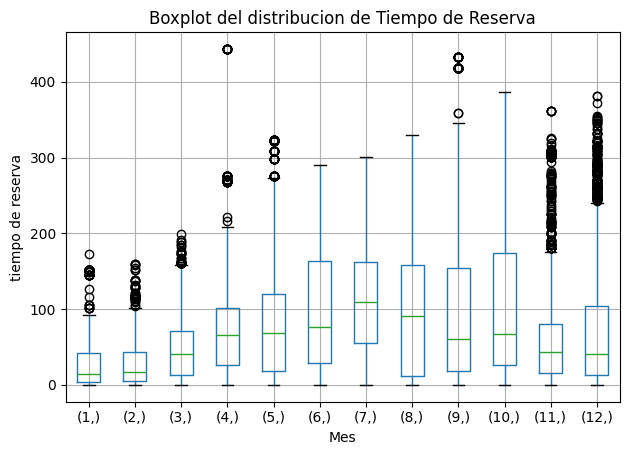

In [52]:
plt.figure(figsize=(60, 20))
data.boxplot(column=["lead_time"], by=["arrival_month"])
plt.title("Boxplot del distribucion de Tiempo de Reserva")
plt.suptitle("")
plt.xlabel("Mes")
plt.ylabel("tiempo de reserva")
plt.tight_layout()
plt.savefig("promedio_tiempo_mes_boxplot.png")
plt.show()

### Practica #3

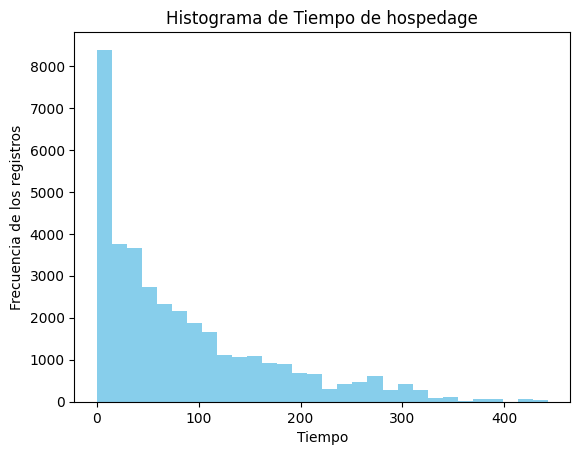

In [53]:
plt.figure()
plt.hist(data["lead_time"], bins=30, color='skyblue')
plt.title("Histograma de Tiempo de hospedage")
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia de los registros")
plt.savefig("histograma_consumo.png")
plt.show()


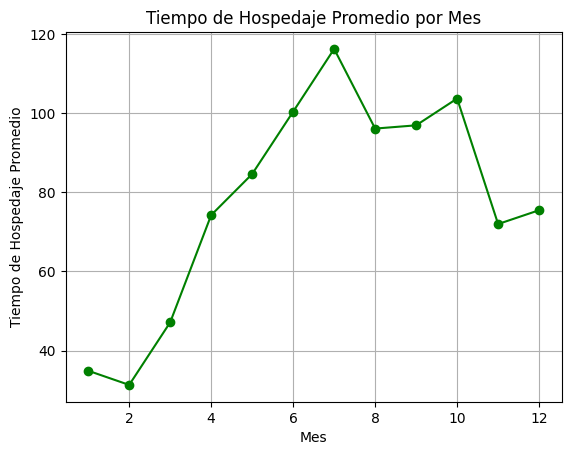

In [54]:
avg_by_hour = data.groupby("arrival_month")["lead_time"].mean()
plt.figure()
avg_by_hour.plot(kind='line', marker='o', color='green')
plt.title("Tiempo de Hospedaje Promedio por Mes")
plt.xlabel("Mes")
plt.ylabel("Tiempo de Hospedaje Promedio")
plt.grid()
plt.savefig("linea_tiempo.png")
plt.show()

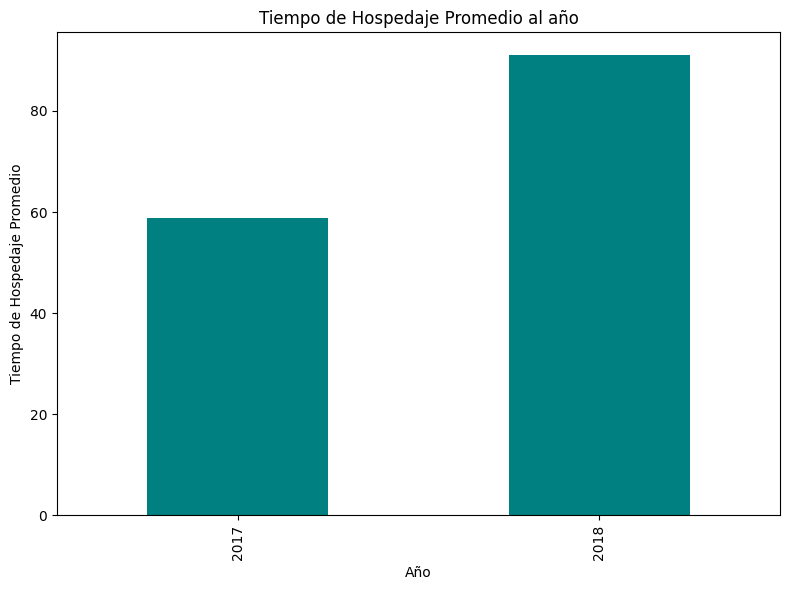

In [55]:
avg_by_day = data.groupby("arrival_year")["lead_time"].mean()
plt.figure(figsize=(8, 6))
avg_by_day.plot(kind='bar', color='teal')
plt.title("Tiempo de Hospedaje Promedio al año")
plt.xlabel("Año")
plt.ylabel("Tiempo de Hospedaje Promedio")
plt.tight_layout()
plt.savefig("barras_tiempo_año.png")
plt.show()

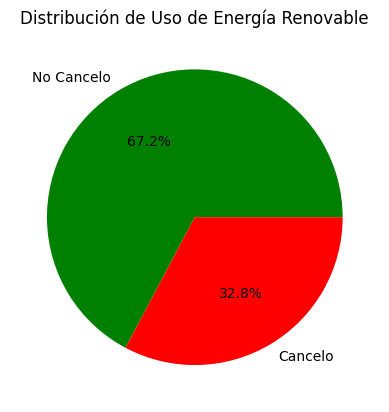

In [56]:
data["NoCancelo"] = data["booking_status"] != "Canceled"
renewable_counts = data["NoCancelo"].value_counts()
plt.figure()
renewable_counts.plot(kind='pie', labels=["No Cancelo", "Cancelo"], autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Distribución de Uso de Energía Renovable")
plt.ylabel("") 
plt.savefig("pie_cancelacion.png")
plt.show()

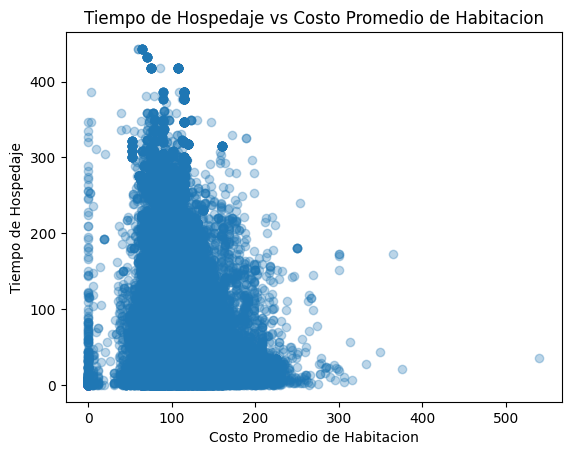

In [57]:
plt.figure()
plt.scatter(data["avg_price_per_room"], data["lead_time"], alpha=0.3)
plt.title("Tiempo de Hospedaje vs Costo Promedio de Habitacion")
plt.xlabel("Costo Promedio de Habitacion")
plt.ylabel("Tiempo de Hospedaje")
plt.savefig("scatter_costo_tiempo.png")
plt.show()

### practica #4

In [61]:
grupos = [grupo['lead_time'].values for _, grupo in data.groupby('arrival_month')]

f_stat, p_value = f_oneway(*grupos)

print(f"F-Statistic: {f_stat:.3f}")
print(f"P-Value: {p_value:.3f}")


if p_value < 0.05:
    print("Hay diferencias significativas entre los meses y el tiempo de hospedaje.")
else:
    print("No hay diferencias significativas entre los meses y el tiempo de hospedaje.")

F-Statistic: 245.175
P-Value: 0.000
Hay diferencias significativas entre los meses y el tiempo de hospedaje.


### practica #5

R² score: 0.0039
Pendiente (coeficiente): -0.025560957109488542


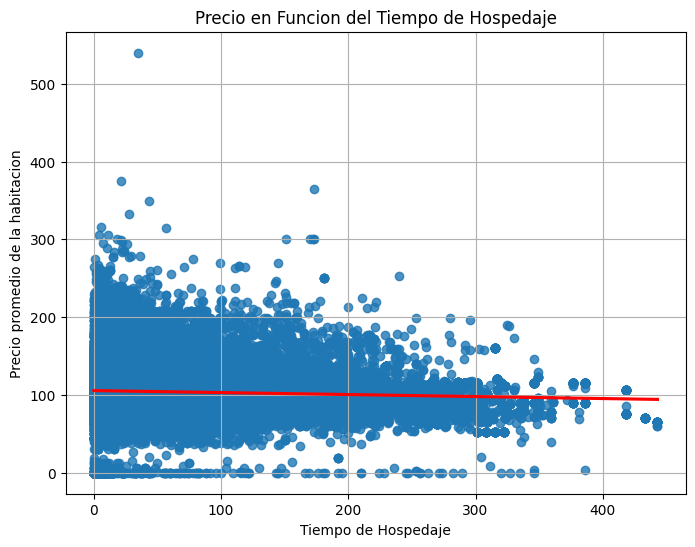

In [101]:
df["type_of_meal_plan"] = df["type_of_meal_plan"].map({"Not Selected": 0, "Meal Plan 1": 1, "Meal Plan 2" : 2, "Meal Plan 3": 3})
df["room_type_reserved"] = df["room_type_reserved"].map({"Room_Type 1": 0, "Room_Type 2": 1, "Room_Type 3": 2, "Room_Type 4": 3, "Room_Type 5": 4, "Room_Type 6": 5, "Room_Type 7": 6})
df["market_segment_type"] = df["market_segment_type"].map({"Offline": 0, "Online": 1, "Corporate": 2 ,"Complementary": 3, "Aviation": 4 })
df["booking_status"] = df["booking_status"].map({"Not_Canceled": 0, "Canceled": 1})

df2 = df.dropna(subset=["lead_time", "avg_price_per_room"])

X = df2[["lead_time"]].values
y = df2["avg_price_per_room"].values

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
print(f"R² score: {r2:.4f}")
print("Pendiente (coeficiente):", modelo.coef_[0])

plt.figure(figsize=(8, 6))
sns.regplot(x="lead_time", y="avg_price_per_room", data=data2, line_kws={"color": "red"})
plt.title("Precio en Funcion del Tiempo de Hospedaje")
plt.xlabel("Tiempo de Hospedaje")
plt.ylabel("Precio promedio de la habitacion")
plt.grid(True)
plt.show()

### Practica #6

In [89]:
df.sample(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,market_segment_type,room_type_reserved,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status
29034,2,0,1,2,1,0,0,1,0,0,124.00,0,1
3545,2,0,1,1,1,0,174,1,0,0,70.00,0,1
27728,2,0,2,4,1,0,118,1,0,0,86.67,1,0
19789,2,0,1,1,1,0,61,0,0,0,72.24,1,0
6880,1,0,0,2,2,0,74,0,0,0,87.00,0,0
29175,2,0,1,5,2,0,98,1,5,0,89.50,2,0
28887,3,0,2,3,1,0,19,1,3,0,130.00,3,0
16241,2,0,1,4,1,0,143,1,0,0,129.60,2,1
24081,2,0,2,2,1,0,81,1,3,0,95.20,0,1
26414,2,0,2,0,1,0,83,0,0,0,75.00,0,0


Accuracy: 0.8090600018377285
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      7276
           1       0.76      0.62      0.68      3607

    accuracy                           0.81     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.81      0.80     10883



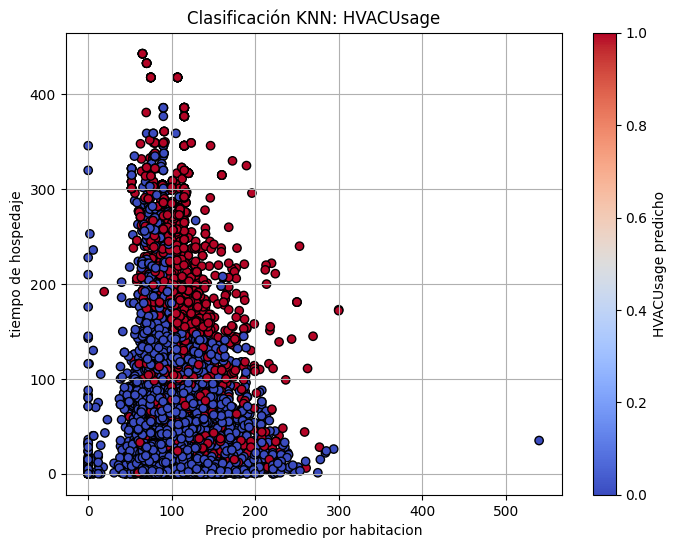

In [105]:
X = df[["no_of_adults", "no_of_children", "no_of_week_nights","required_car_parking_space",
          "lead_time","repeated_guest", "avg_price_per_room","no_of_special_requests"]]
y = df["booking_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

y_pred = modelo_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

X_plot = X_test

y_pred = modelo_knn.predict(X_test)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_plot["avg_price_per_room"], X_plot["lead_time"], c=y_pred, cmap="coolwarm", edgecolor="k")
plt.xlabel("Precio promedio por habitacion")
plt.ylabel("tiempo de hospedaje")
plt.title("Clasificación KNN: HVACUsage")
plt.colorbar(scatter, label="HVACUsage predicho")
plt.grid(True)
plt.show()

### Practica #7

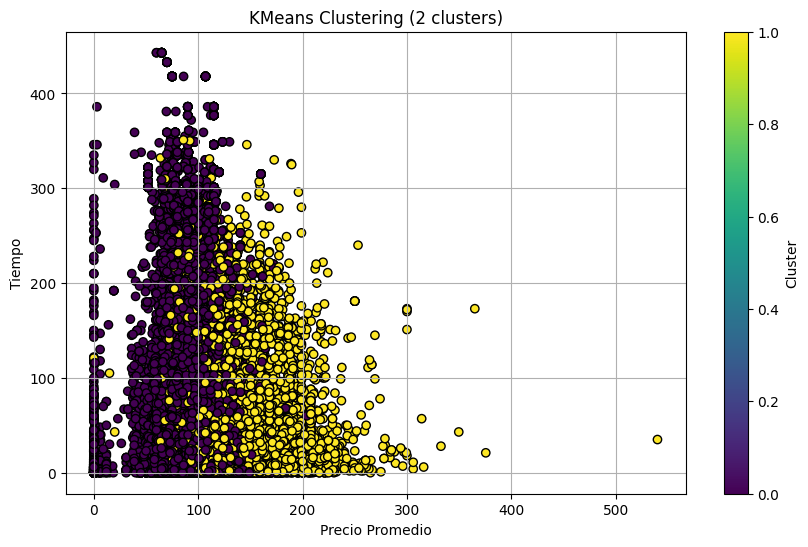

Cantidad de puntos por cluster:
Cluster
0.0    25238
1.0    11037
Name: count, dtype: int64


In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df.loc[X.index, "Cluster"] = clusters

plt.figure(figsize=(10,6))
plt.scatter(X["avg_price_per_room"], X["lead_time"], c=clusters, cmap="viridis", edgecolor='k')
plt.xlabel("Precio Promedio")
plt.ylabel("Tiempo")
plt.title("KMeans Clustering (2 clusters)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

print("Cantidad de puntos por cluster:")
print(df["Cluster"].value_counts())

### Practica #8

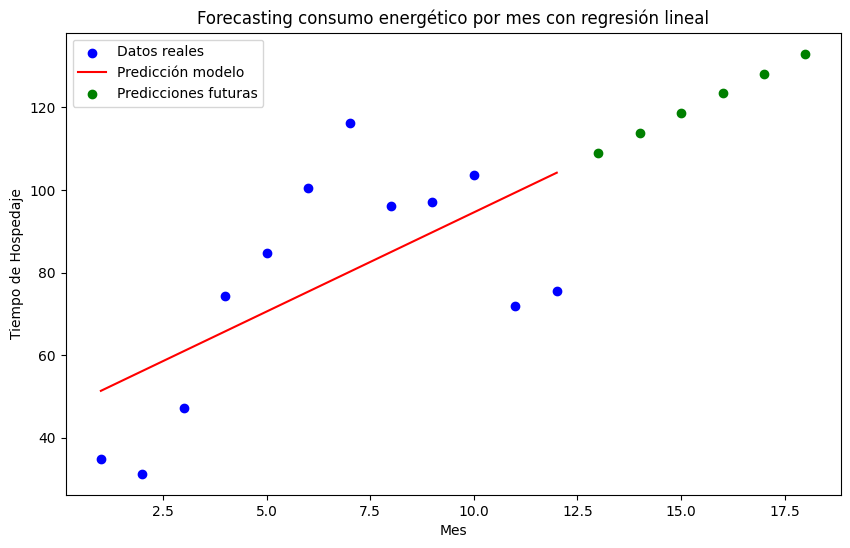

In [106]:
df['arrival_month'] = pd.to_numeric(df['arrival_month'], errors='coerce')

df_mes = df.groupby('arrival_month')['lead_time'].mean().reset_index()

X = df_mes[['arrival_month']].values  
y = df_mes['lead_time'].values 

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

X_new = np.array([[13], [14], [15], [16], [17], [18]])
y_new_pred = modelo.predict(X_new)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Predicción modelo')
plt.scatter(X_new, y_new_pred, color='green', label='Predicciones futuras')
plt.xlabel('Mes')
plt.ylabel('Tiempo de Hospedaje')
plt.title('Forecasting consumo energético por mes con regresión lineal')
plt.legend()
plt.show()

### Practica #9

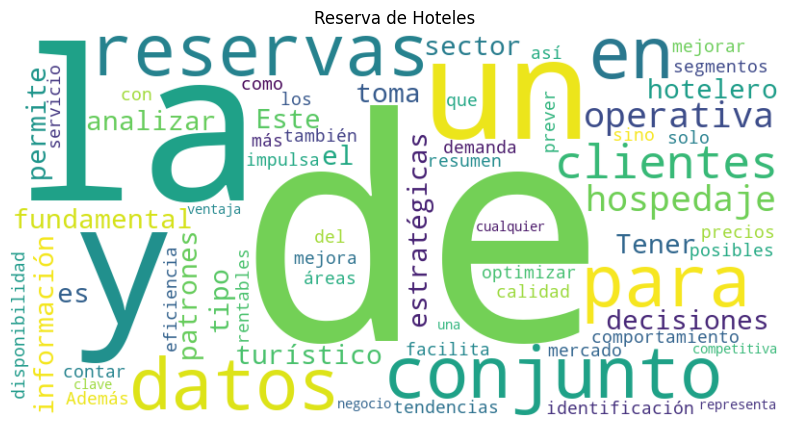

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texto = """
Tener un conjunto de datos de reservas de hospedajes es fundamental para la toma de decisiones estratégicas en el sector turístico y hotelero. 
Este tipo de información permite analizar patrones de comportamiento de los clientes, prever la demanda, optimizar precios y disponibilidad, así como mejorar la calidad del servicio. 
Además, facilita la identificación de tendencias de mercado, segmentos de clientes más rentables y posibles áreas de mejora operativa. 
En resumen, contar con un conjunto de datos de reservas no solo impulsa la eficiencia operativa, sino que también representa una ventaja competitiva clave para cualquier negocio de hospedaje.
"""

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Reserva de Hoteles")
plt.show()